<a href="https://colab.research.google.com/github/sameeraiz/ML---Project-Regression-Analysis-Transport-Demand-Prediction/blob/main/Mohammad_Faiz_ML_Project_(Regression_Analysis)_Transport_Demand_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Project Name**    - Transport Demand Prediction








##### **Project Type**    - ML - Linear Regression
##### **Contribution**    - Team
##### **Team Member 1 -** Mohammad Faiz
##### **Team Member 2 -** Toyaj kumar yadav

# **Project Summary -**

*   Transport Demand Prediction is a good dataset for New learners of Machine  learning Algorithms.
*  In This project we got 1-CSV (Comma_Seperated_Files) named "Nairobi_transport_data.csv" ,  Where we performed the data cleaning and data manipulation to get an understanding of Dataset. 
* Later we performed the Exploratory Data Analysis on dataset to explore the over all dataset.
*   After exploring our dataset we were ready to go for Machine Learning.
*   Before applying any ML model in our dataset we checked for outliers and removed them from our data, so that our trained model will not give any predictions.
*   We worked on converting the categorical data into the binary ones.
*   we applied multiple models on our dataset to see which one is giving the best results , accuracy & low-errors.
*   At last we found XGBOOST model giving the best results.
*   The biggest challenge we faced making project was finding the Dependent variable.





# **GitHub Link -**

Provide your GitHub Link here.

# **Problem Statement**


***Exploring 14 different towns to the North-West of the Nairobi towards Lake Victoria and using the data provided by bus ticket sales from MobiTicket predicting the number of tickets that would be sold for the buses that ends at Nairobi.  ***

#### **Defining Business Objective?**

**Build a Model that can Predicts the number of seats that Mobiticket can expect to sell for each ride, i.e.,  for a specific ROUTE on a specific DATE and TIME.**

# ***Let's Begin !***

## ***1. Know Your Data***

### Import Libraries

In [ ]:
# Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import GridSearchCV
import xgboost as xgb

### Dataset Loading

In [ ]:
# Load Dataset
df = pd.read_csv("https://drive.google.com/uc?id=1QGvQFKeWCqXUmQB849tLjxBrPiwxhGeT")
df

,ride_id,seat_number,payment_method,payment_receipt,travel_date,travel_time,travel_from,travel_to,car_type,max_capacity
0,1442,15A,Mpesa,UZUEHCBUSO,17-10-17,7:15,Migori,Nairobi,Bus,49
1,5437,14A,Mpesa,TIHLBUSGTE,19-11-17,7:12,Migori,Nairobi,Bus,49
2,5710,8B,Mpesa,EQX8Q5G19O,26-11-17,7:05,Keroka,Nairobi,Bus,49
3,5777,19A,Mpesa,SGP18CL0ME,27-11-17,7:10,Homa Bay,Nairobi,Bus,49
4,5778,11A,Mpesa,BM97HFRGL9,27-11-17,7:12,Migori,Nairobi,Bus,49
...,...,...,...,...,...,...,...,...,...,...
51640,13826,9B,Mpesa,8V2XDDZR6V,20-04-18,8:00,Awendo,Nairobi,Bus,49
51641,13809,18A,Mpesa,4PEBSVJSNK,20-04-18,8:00,Migori,Nairobi,Bus,49
51642,13809,17A,Mpesa,LVN64LZDNN,20-04-18,8:00,Migori,Nairobi,Bus,49
51643,13796,16B,Mpesa,REYBSKTYWN,20-04-18,7:08,Awendo,Nairobi,Bus,49


### Dataset First View

In [ ]:
# Dataset First Look
df

,ride_id,seat_number,payment_method,payment_receipt,travel_date,travel_time,travel_from,travel_to,car_type,max_capacity
0,1442,15A,Mpesa,UZUEHCBUSO,17-10-17,7:15,Migori,Nairobi,Bus,49
1,5437,14A,Mpesa,TIHLBUSGTE,19-11-17,7:12,Migori,Nairobi,Bus,49
2,5710,8B,Mpesa,EQX8Q5G19O,26-11-17,7:05,Keroka,Nairobi,Bus,49
3,5777,19A,Mpesa,SGP18CL0ME,27-11-17,7:10,Homa Bay,Nairobi,Bus,49
4,5778,11A,Mpesa,BM97HFRGL9,27-11-17,7:12,Migori,Nairobi,Bus,49
...,...,...,...,...,...,...,...,...,...,...
51640,13826,9B,Mpesa,8V2XDDZR6V,20-04-18,8:00,Awendo,Nairobi,Bus,49
51641,13809,18A,Mpesa,4PEBSVJSNK,20-04-18,8:00,Migori,Nairobi,Bus,49
51642,13809,17A,Mpesa,LVN64LZDNN,20-04-18,8:00,Migori,Nairobi,Bus,49
51643,13796,16B,Mpesa,REYBSKTYWN,20-04-18,7:08,Awendo,Nairobi,Bus,49


### Dataset Rows & Columns count

In [ ]:
# Dataset Rows & Columns count
print("Total numer of rows and columns are :")
df.shape

Total numer of rows and columns are :


(51645, 10)

### Dataset Information

In [ ]:
# Dataset Info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51645 entries, 0 to 51644
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   ride_id          51645 non-null  int64 
 1   seat_number      51645 non-null  object
 2   payment_method   51645 non-null  object
 3   payment_receipt  51645 non-null  object
 4   travel_date      51645 non-null  object
 5   travel_time      51645 non-null  object
 6   travel_from      51645 non-null  object
 7   travel_to        51645 non-null  object
 8   car_type         51645 non-null  object
 9   max_capacity     51645 non-null  int64 
dtypes: int64(2), object(8)
memory usage: 3.9+ MB


#### Duplicate Values

In [ ]:
# Dataset Duplicate Value Count --> No  duplicate value found..
print("We found ZERO Duplicate rows , So NO need to use the drop_duplicates(inplace=True) to which helps to delete the duplicate values")
print(df.duplicated().sum())

We found ZERO Duplicate rows , So NO need to use the drop_duplicates(inplace=True) to which helps to delete the duplicate values
0


#### Missing Values/Null Values

In [ ]:
# Missing Values/Null Values Count
print(df.isna().sum())   # We all know about the isnull fucntionality , but we used isna for more knowledge..
print("In all the Columns we found 0-empty cells...")

ride_id            0
seat_number        0
payment_method     0
payment_receipt    0
travel_date        0
travel_time        0
travel_from        0
travel_to          0
car_type           0
max_capacity       0
dtype: int64
In all the Columns we found 0-empty cells...


As we can see no Horizontal white-lines in any column's bars, which means our data is free from null values or empty cells.


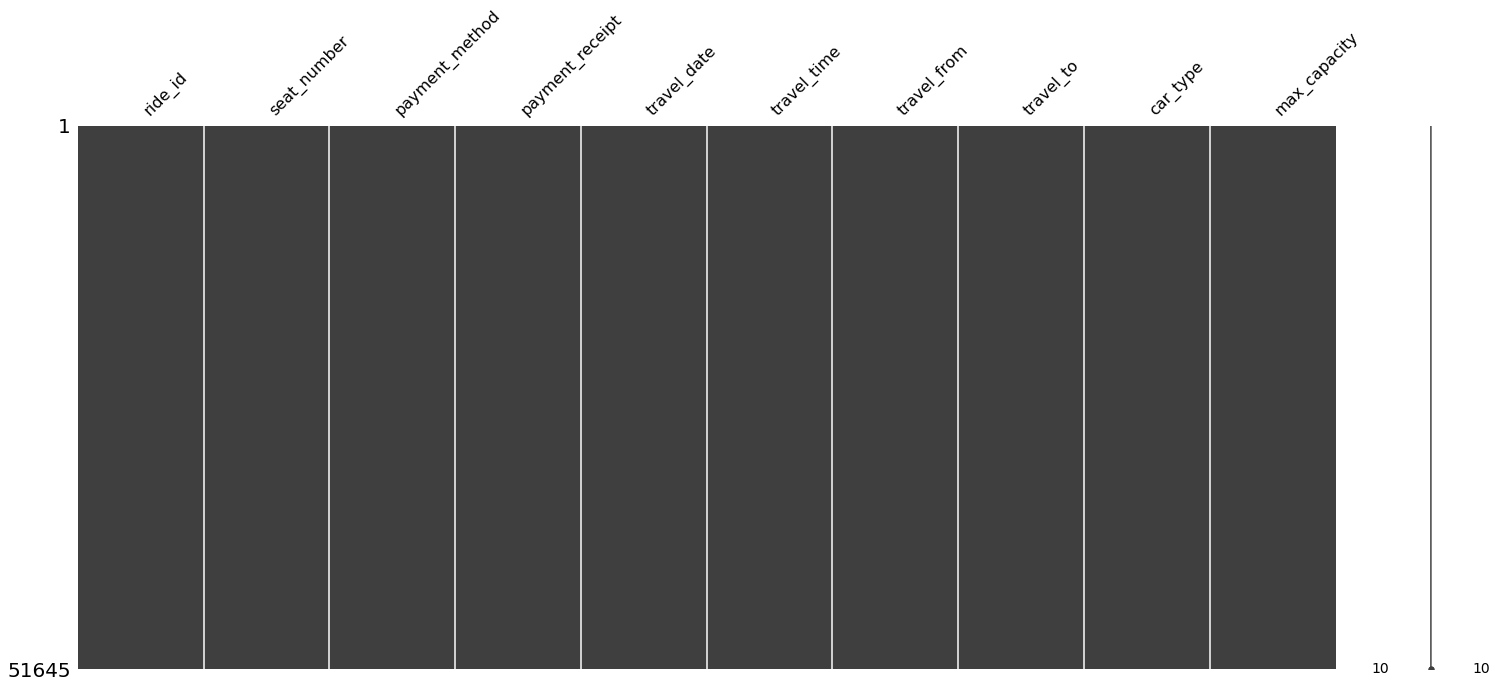

In [ ]:
# Visualizing the missing values, Steps to visualise the missing values.
# 1-> Import the Library.
# 2-> Load the dataset. 
# 3-> Visualize missing values as matrix 
# This is an example of UNIVARIATE Analysis 

print("As we can see no Horizontal white-lines in any column's bars, which means our data is free from null values or empty cells.")
import missingno as msno      # We are also adding the library in main library cell , where all the libraries have written..   
msno.matrix(df)

### What did you know about your dataset?

*   We found that total number of rows are "51645" and columns are "10".
*   We learned that there are 2 Payment_methods available, MPESA is widely used while CASH is rarely used for payment..
*   We learned that there are 2 types of transport services available(CAR_TYPE), one is "BUS" while other is "SHUTTLE"
*   Max. capacity availability for BUS is 49 & SHUTTLE is 11.
*   Best thing is none of the columns contains any DUPLICATE VALUES and NULL-VALUES(Empty cells) till now.

## ***2. Understanding Your Variables***

In [ ]:
# Dataset Columns
df.columns

Index(['ride_id', 'seat_number', 'payment_method', 'payment_receipt',
       'travel_date', 'travel_time', 'travel_from', 'travel_to', 'car_type',
       'max_capacity'],
      dtype='object')

In [ ]:
# Dataset Describe
df.describe()

,ride_id,max_capacity
count,51645.000000,51645.000000
mean,10188.645793,34.534321
std,2211.295708,18.451193
min,1442.000000,11.000000
25%,8287.000000,11.000000
50%,10353.000000,49.000000
75%,12029.000000,49.000000
max,20117.000000,49.000000


In [ ]:
# All Dataset Describe
df.describe(include="all")

,ride_id,seat_number,payment_method,payment_receipt,travel_date,travel_time,travel_from,travel_to,car_type,max_capacity
count,51645.000000,51645,51645,51645,51645,51645,51645,51645,51645,51645.000000
unique,NaN,61,2,51645,149,78,17,1,2,NaN
top,NaN,1,Mpesa,UZUEHCBUSO,10-12-17,7:09,Kisii,Nairobi,Bus,NaN
freq,NaN,2065,51532,1,856,3926,22607,51645,31985,NaN
mean,10188.645793,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,34.534321
std,2211.295708,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,18.451193
min,1442.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,11.000000
25%,8287.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,11.000000
50%,10353.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,49.000000
75%,12029.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,49.000000


From above table we are getting the following information: 

1.   We have 2 kinds of cars_type and most of them are Bus,as i have already mentioned above.
2.   In travel_date we have 149 unique days.

1.   We have 2 payment Methods.

### Variables Description 

*   **ride_id:** A Unique Id given to a vehicle on a specific route on a specific day and time.
*   **seat_number:** Seats that are assigned to the ticket purchasers.
*   **payment_method:** Method used by customer to purchase ticket from Mobiticket (Mpesa or cash).
*   **payment_receipt:** Unique id_number for ticket purchased from MobiTicket.
*   **travel_date:** date of ride departure. (mm/dd/yyyy)
*   **travel_time:** scheduled departure time of ride. Rides generally depart on time. (hh:mm).
*   **travel_from:** The town from which ride originated.
*   **travel_to:** Destination of ride. All rides are to Nairobi.
*   **car_type:** vehicle type (BUS or SHUTTLE)
*   **max_capacity:** Total number of seats available.









### Check Unique Values for each variable.

In [ ]:
df['ride_id'].unique()

array([ 1442,  5437,  5710, ..., 13825, 13826, 14304])

In [ ]:
df['seat_number'].unique()

array(['15A', '14A', '8B', '19A', '11A', '18B', '25', '21B', '22A', '17B',
       '1X', '3A', '1B', '1', '4A', '18A', '23A', '5', '16B', '8', '15B',
       '10', '3', '9', '7', '6', '4', '2', '20A', '9A', '22B', '23B',
       '24A', '2B', '13B', '24B', '14B', '20B', '19B', '10A', '17A', '2A',
       '7B', '6B', '5B', '3B', '4B', '1A', '5A', '6A', '21A', '13A', '8A',
       '9B', '12B', '10B', '7A', '16A', '12A', '11B', '14'], dtype=object)

In [ ]:
df['payment_method'].unique()

array(['Mpesa', 'Cash'], dtype=object)

In [ ]:
df['payment_receipt'].unique()

array(['UZUEHCBUSO', 'TIHLBUSGTE', 'EQX8Q5G19O', ..., 'LVN64LZDNN',
       'REYBSKTYWN', 'AQN7FBUSGP'], dtype=object)

In [ ]:
df['travel_date'].unique()

array(['17-10-17', '19-11-17', '26-11-17', '27-11-17', '20-04-18',
       '19-04-18', '18-04-18', '17-04-18', '16-04-18', '15-04-18',
       '14-04-18', '13-04-18', '12-04-18', '11-04-18', '28-11-17',
       '10-04-18', '09-04-18', '08-04-18', '07-04-18', '06-04-18',
       '05-04-18', '04-04-18', '03-04-18', '02-04-18', '01-04-18',
       '31-03-18', '30-03-18', '29-03-18', '28-03-18', '27-03-18',
       '29-11-17', '26-03-18', '25-03-18', '24-03-18', '23-03-18',
       '22-03-18', '21-03-18', '20-03-18', '19-03-18', '18-03-18',
       '17-03-18', '16-03-18', '30-11-17', '01-12-17', '15-03-18',
       '02-12-17', '14-03-18', '13-03-18', '03-12-17', '04-12-17',
       '12-03-18', '05-12-17', '11-03-18', '06-12-17', '10-03-18',
       '09-03-18', '07-12-17', '08-03-18', '08-12-17', '07-03-18',
       '06-03-18', '09-12-17', '10-12-17', '05-03-18', '04-03-18',
       '11-12-17', '12-12-17', '03-03-18', '02-03-18', '13-12-17',
       '01-03-18', '14-12-17', '28-02-18', '27-02-18', '15-12-

In [ ]:
df['travel_time'].unique()

array(['7:15', '7:12', '7:05', '7:10', '7:09', '5:10', '9:50', '7:06',
       '6:00', '5:50', '10:58', '6:50', '5:30', '6:40', '9:10', '5:00',
       '5:20', '10:52', '10:50', '10:51', '8:20', '19:03', '7:02', '6:30',
       '7:20', '7:04', '19:05', '19:04', '6:59', '7:08', '5:40', '9:00',
       '7:14', '7:07', '8:00', '7:30', '10:57', '8:30', '11:01', '7:11',
       '7:03', '6:58', '11:05', '10:20', '10:53', '10:00', '8:50',
       '10:54', '7:01', '7:00', '6:10', '6:20', '10:10', '11:02', '9:40',
       '9:30', '7:50', '10:56', '10:55', '10:40', '10:30', '9:20', '8:40',
       '8:10', '7:40', '7:13', '11:00', '11:04', '19:06', '10:59',
       '11:07', '11:06', '11:03', '19:07', '11:08', '11:09', '23:09',
       '23:10'], dtype=object)

In [ ]:
df['travel_from'].unique()

array(['Migori', 'Keroka', 'Homa Bay', 'Kisii', 'Keumbu', 'Rongo',
       'Kijauri', 'Oyugis', 'Awendo', 'Sirare', 'Nyachenge', 'Kehancha',
       'Kendu Bay', 'Sori', 'Rodi', 'Mbita', 'Ndhiwa'], dtype=object)

In [ ]:
df['travel_to'].unique()

array(['Nairobi'], dtype=object)

In [ ]:
df['car_type'].unique()

array(['Bus', 'shuttle'], dtype=object)

In [ ]:
df['max_capacity'].unique()

array([49, 11])

## 3. ***Data Wrangling***

### Data Wrangling Code

In [ ]:
# Write your code to make your dataset analysis ready.
# Let's find the dependent variable...
dependent_variable = df.groupby(['ride_id'])['seat_number'].count().reset_index()
dependent_variable.head()

,ride_id,seat_number
0,1442,1
1,5437,1
2,5710,1
3,5777,5
4,5778,31


In [ ]:
# We have found the multiple duplicate values in ride_id.
# So we will drop all the duplicate ride_id rows.
df = df.drop_duplicates(subset='ride_id')

In [ ]:
print("Now we are left with these rows and columns ",df.shape)

Now we are left with these rows and columns  (6249, 10)


In [ ]:
# Merging our dependent variable with our dataset.
df = df.merge(dependent_variable, how="left",on="ride_id")
df.head()

,ride_id,seat_number_x,payment_method,payment_receipt,travel_date,travel_time,travel_from,travel_to,car_type,max_capacity,seat_number_y
0,1442,15A,Mpesa,UZUEHCBUSO,17-10-17,7:15,Migori,Nairobi,Bus,49,1
1,5437,14A,Mpesa,TIHLBUSGTE,19-11-17,7:12,Migori,Nairobi,Bus,49,1
2,5710,8B,Mpesa,EQX8Q5G19O,26-11-17,7:05,Keroka,Nairobi,Bus,49,1
3,5777,19A,Mpesa,SGP18CL0ME,27-11-17,7:10,Homa Bay,Nairobi,Bus,49,5
4,5778,11A,Mpesa,BM97HFRGL9,27-11-17,7:12,Migori,Nairobi,Bus,49,31


In [ ]:
# RENAME COLUMNS.
df.rename(columns={'seat_number_x':'seat_number','seat_number_y':'number_of_tickets'},inplace= True)
df.head()

,ride_id,seat_number,payment_method,payment_receipt,travel_date,travel_time,travel_from,travel_to,car_type,max_capacity,number_of_tickets
0,1442,15A,Mpesa,UZUEHCBUSO,17-10-17,7:15,Migori,Nairobi,Bus,49,1
1,5437,14A,Mpesa,TIHLBUSGTE,19-11-17,7:12,Migori,Nairobi,Bus,49,1
2,5710,8B,Mpesa,EQX8Q5G19O,26-11-17,7:05,Keroka,Nairobi,Bus,49,1
3,5777,19A,Mpesa,SGP18CL0ME,27-11-17,7:10,Homa Bay,Nairobi,Bus,49,5
4,5778,11A,Mpesa,BM97HFRGL9,27-11-17,7:12,Migori,Nairobi,Bus,49,31


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6249 entries, 0 to 6248
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   ride_id            6249 non-null   int64 
 1   seat_number        6249 non-null   object
 2   payment_method     6249 non-null   object
 3   payment_receipt    6249 non-null   object
 4   travel_date        6249 non-null   object
 5   travel_time        6249 non-null   object
 6   travel_from        6249 non-null   object
 7   travel_to          6249 non-null   object
 8   car_type           6249 non-null   object
 9   max_capacity       6249 non-null   int64 
 10  number_of_tickets  6249 non-null   int64 
dtypes: int64(3), object(8)
memory usage: 585.8+ KB


### What all manipulations have you done and insights you found?


Observations:
1.   First of all we needed a Dependent Variable so we performed the GROUPBY operation with "ride_id & seat_number" to get it.   
2. Second we found multiple duplicate values so dropped them all.      
3. Third, after removing all the duplicate values from "ride_id" we merge ride_id column to our actual dataset.
4. Fourth, few column's name in our dataset changed slighly during data-manipulation, so RENAMED them using rename(). 
5. Now our data is ready for Data-Visualization.






## ***4. Data Vizualization, Storytelling & Experimenting with charts : Understand the relationships between variables***

#### **Chart - 1**

In [ ]:
# Chart - 1 visualization code
df.columns

Index(['ride_id', 'seat_number', 'payment_method', 'payment_receipt',
       'travel_date', 'travel_time', 'travel_from', 'travel_to', 'car_type',
       'max_capacity', 'number_of_tickets'],
      dtype='object')

In [ ]:
features =['payment_method', 'car_type', 'max_capacity']

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


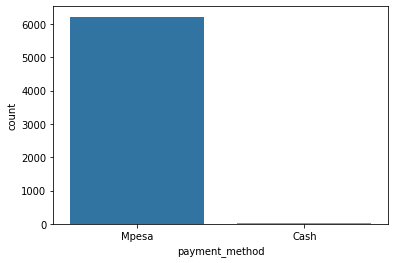

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


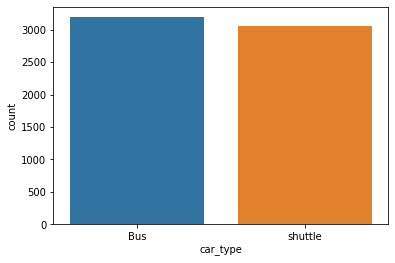

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


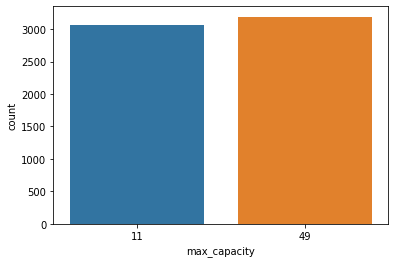

In [ ]:
for column in features:
  sns.countplot(df[column])
  plt.show()

##### 1. Why did you pick the specific chart?

This graph is perfect for graphical representation of such data, where a data column has 2 sub categories. and we need to find the difference between them.




##### 2. What is/are the insight(s) found from the chart?

1.   We have two types of car 'Bus and Shuttle' which has maximum capacity of 49 and 11.
2.   We have two types of payment Method Mpesa and cash, people rarely pay Cash.


##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

* Yes, the sight gained from the graphs will create a positive business impact.
* We didn't find any negative business growth.



#### **Chart - 2**

In [ ]:
# Chart - 2 visualization code
df.columns

Index(['ride_id', 'seat_number', 'payment_method', 'payment_receipt',
       'travel_date', 'travel_time', 'travel_from', 'travel_to', 'car_type',
       'max_capacity', 'number_of_tickets'],
      dtype='object')

In [ ]:
# created dataframe to analyse Routes.
routes_tickets = df.groupby(['travel_from'])['number_of_tickets'].sum().reset_index()
routes_tickets

,travel_from,number_of_tickets
0,Awendo,1788
1,Homa Bay,6304
2,Kehancha,1909
3,Kendu Bay,1
4,Keroka,988
5,Keumbu,22
6,Kijauri,1031
7,Kisii,22607
8,Mbita,378
9,Migori,7027


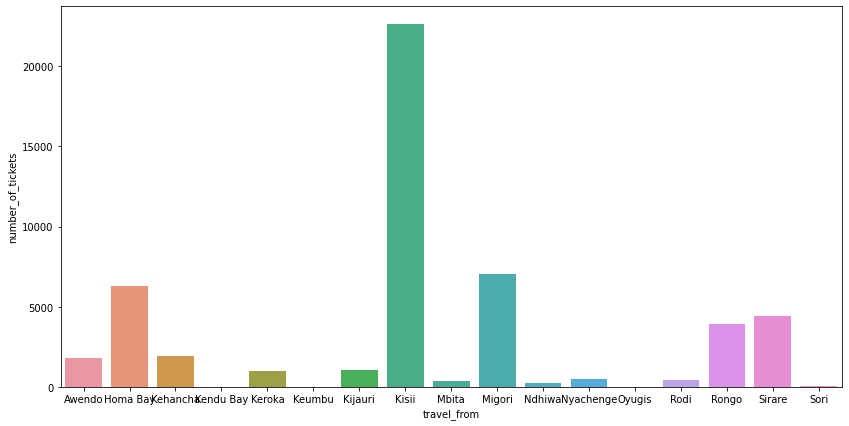

In [ ]:
# RIDE ORIGIN TOWNS
plt.rcParams['figure.figsize']= (14,7)
sns.barplot(x= 'travel_from',y= 'number_of_tickets', data= routes_tickets)

##### 1. Why did you pick the specific chart?

With the help of Barplot one can easily see the Total number of ticket sold for each Routes

##### 2. What is/are the insight(s) found from the chart?

The insight we have got from barplot is that max. number of tickets are booked for "kisii" followed by "migori, Homa Bay, sirare and Rongo. "

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

The gained insight will surely help in creating a positive business impact even more, if we increase the number of rides on "kisii" followed by "migori, Homa Bay, sirare and Rongo". And remove the rides from "Kendu bay, keumbu, Oyugis and Sori" because in these routes tickets are rarely booked.

#### **Chart - 3**

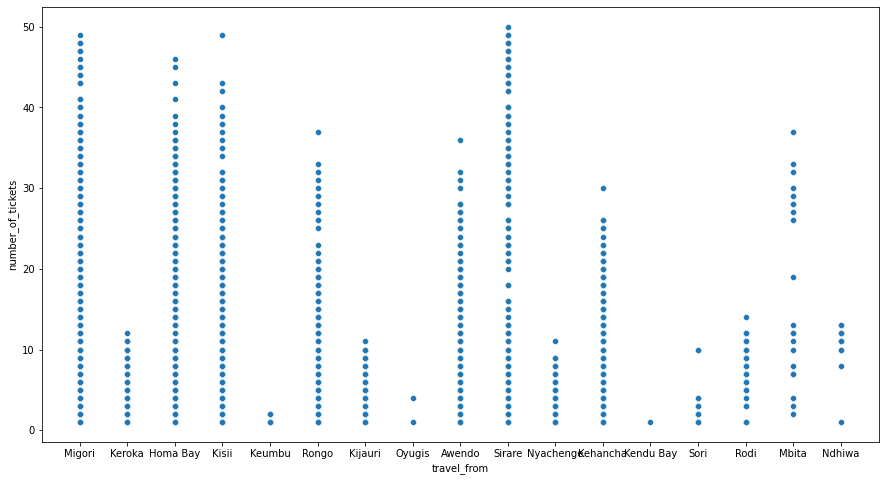

In [ ]:
# Chart - 3 visualization code
# Scatter plot of travel_from by number of tickets.
plt.rcParams['figure.figsize']= (15,8)
sns.scatterplot(x= 'travel_from',y= 'number_of_tickets', data= df)

##### 1. Why did you pick the specific chart?

1. As we can see from which Town how many seats booking are happening. so we can ,find out that from which town most of the bookings are coming.
2.  In above scatter plot we can see the distribution of number of tickets in different Routes.



##### 2. What is/are the insight(s) found from the chart?

By looking at the graph, it can be find out that where is the max. number of distribution of tickets are. 

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

It will help creating a positive business impact..

#### **Chart - 4**

In [ ]:
#Lets convert  teavel_date and travel_time columns to datetime format.
df["travel_date"]=pd.to_datetime(df["travel_date"])
df['travel_time']=pd.to_datetime(df["travel_time"])


In [ ]:
#Lets extract the important features from teavel_date and travel_time columns.
df["day_of_week"]=df["travel_date"].dt.dayofweek
df["day_of_year"]=df["travel_date"].dt.dayofyear
df["day_of_month"]=df["travel_date"].dt.day
df["is_weekend"]=df["day_of_week"].apply( lambda x : 1 if x  in [5,6] else 0 )
df["hour"]=df["travel_time"].dt.hour
df["minute"]=df["travel_time"].dt.minute
df["month"]=df["travel_date"].dt.month

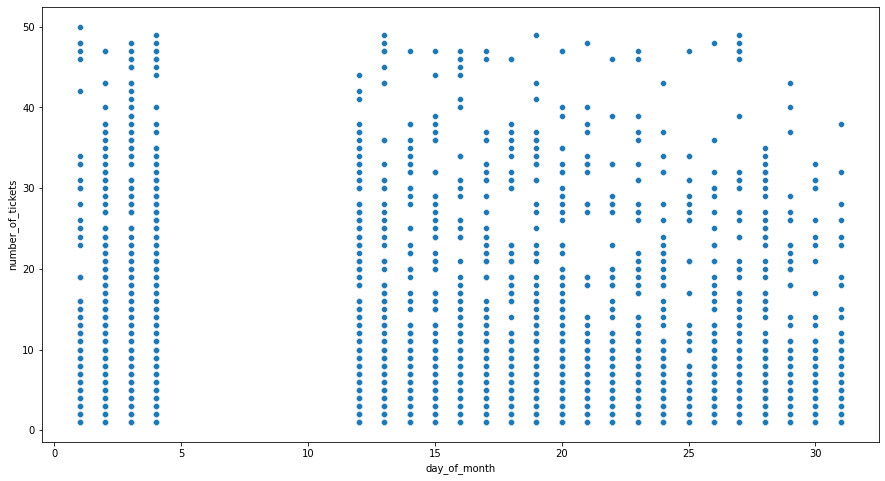

In [ ]:
# Day wise travel trend..
plt.rcParams['figure.figsize']= (15,8)
sns.scatterplot(x=df['day_of_month'],y= df['number_of_tickets'])

##### 1. Why did you pick the specific chart?

With the help of scatter plot we can easily understand the number of tickets booking days wise in a month.

##### 2. What is/are the insight(s) found from the chart?

We can see that there is the gap between 5 to 11 in the day of the month. We can assume that there is official holyday of public transport between these days. we can also say that the number of tickets in all the days of month are same.

#### **Chart - 5**

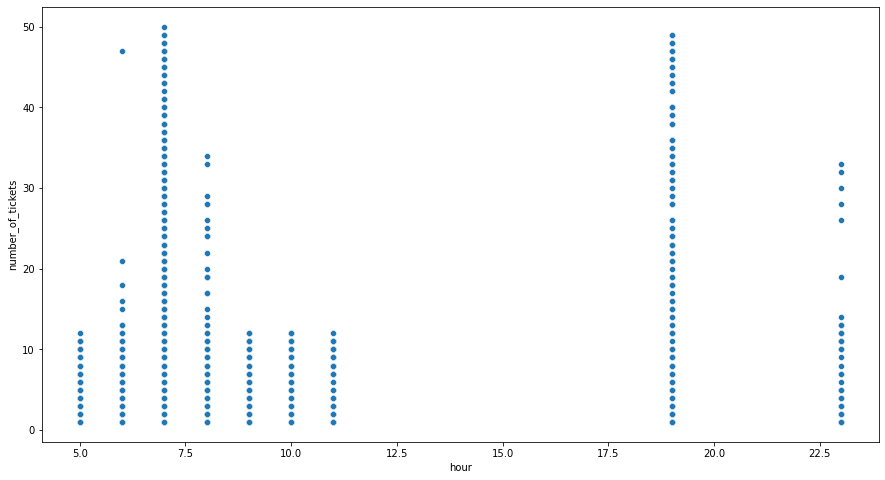

In [ ]:
# Hourly travel trend..
plt.rcParams['figure.figsize']= (15,8)
sns.scatterplot(x=df['hour'],y= df['number_of_tickets'])

##### 1. Why did you pick the specific chart?

We choose this scatter-plot to understand the tickets booking hourly.

##### 2. What is/are the insight(s) found from the chart?

We can see that most of the ticktes were sold at 7 AM and 8 PM. And that seems true because in the morning most of the people go to the work and office.

From the above we can say that there is not ride between 12pm to 5.30Pm

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

The insights that we have got from this plot, which says that scheduling most of the rides in the morning and evening by 7 would create a huge positive business impact.

#### Chart - 6

In [ ]:
# Chart - 6 visualization code#calculating distance between two points using google maps.
distance = {'Migori': 370 , 'Keroka': 280, 'Homa Bay':360, 'Kisii':305.1, 'Keumbu':295, 'Rongo':332,
'Kijauri':271, 'Oyugis':330.6, 'Awendo':351, 'Sirare':392, 'Nyachenge':326, 'Kehancha': 387.7,
'Kendu Bay':347, 'Sori':399, 'Rodi':348, 'Mbita':401, 'Ndhiwa': 371}
df["distance"]=df.travel_from.map(distance)

In [ ]:
#calculating travel time between two points using google maps.
#  7*60 is converting hours into minutes.
time = {'Migori': 7*60+8 , 'Keroka': 5*60, 'Homa Bay':7*60, 'Kisii':5*60+34, 'Keumbu':5*60+20, 'Rongo':6*60+21,
'Kijauri':60*4+50,'Oyugis':5*60+50, 'Awendo':6*60+38, 'Sirare':7*60+30, 'Nyachenge':6*60+10, 'Kehancha':7*60+10,
'Kendu Bay':6*60+10, 'Sori':7*60+30, 'Rodi':6*60+40, 'Mbita':7*60+23, 'Ndhiwa': 7*60}
df["time_taken"]=df.travel_from.map(time)

In [ ]:
df.head()

,ride_id,seat_number,payment_method,payment_receipt,travel_date,travel_time,travel_from,travel_to,car_type,max_capacity,number_of_tickets,day_of_week,day_of_year,day_of_month,is_weekend,hour,minute,month,distance,time_taken
0,1442,15A,Mpesa,UZUEHCBUSO,2017-10-17,2023-02-10 07:15:00,Migori,Nairobi,Bus,49,1,1,290,17,0,7,15,10,370.0,428
1,5437,14A,Mpesa,TIHLBUSGTE,2017-11-19,2023-02-10 07:12:00,Migori,Nairobi,Bus,49,1,6,323,19,1,7,12,11,370.0,428
2,5710,8B,Mpesa,EQX8Q5G19O,2017-11-26,2023-02-10 07:05:00,Keroka,Nairobi,Bus,49,1,6,330,26,1,7,5,11,280.0,300
3,5777,19A,Mpesa,SGP18CL0ME,2017-11-27,2023-02-10 07:10:00,Homa Bay,Nairobi,Bus,49,5,0,331,27,0,7,10,11,360.0,420
4,5778,11A,Mpesa,BM97HFRGL9,2017-11-27,2023-02-10 07:12:00,Migori,Nairobi,Bus,49,31,0,331,27,0,7,12,11,370.0,428


#### **Chart - 7 - Correlation Heatmap**

In [ ]:
# Correlation Heatmap visualization code
corr_columns = df[['distance','time_taken','number_of_tickets']]

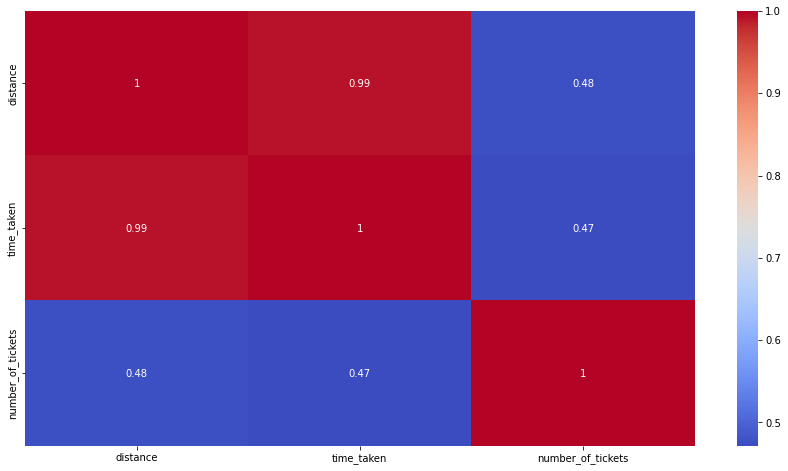

In [ ]:
correlation = corr_columns.corr()
sns.heatmap(abs(correlation), annot=True, cmap='coolwarm')

##### 1. Why did you pick the specific chart?

To understand co relation between variables.

##### 2. What is/are the insight(s) found from the chart?

We can see that distance and time_taken column have strong Multicollinearity with each other. so we have to do something about it.

we know that Speed = Distance/Time so we will use it and drop distance and time_taken.

In [ ]:
# create speed column.
df['speed']= df['distance']/df['time_taken']

In [ ]:
df.head()

,ride_id,seat_number,payment_method,payment_receipt,travel_date,travel_time,travel_from,travel_to,car_type,max_capacity,...,day_of_week,day_of_year,day_of_month,is_weekend,hour,minute,month,distance,time_taken,speed
0,1442,15A,Mpesa,UZUEHCBUSO,2017-10-17,2023-02-10 07:15:00,Migori,Nairobi,Bus,49,...,1,290,17,0,7,15,10,370.0,428,0.864486
1,5437,14A,Mpesa,TIHLBUSGTE,2017-11-19,2023-02-10 07:12:00,Migori,Nairobi,Bus,49,...,6,323,19,1,7,12,11,370.0,428,0.864486
2,5710,8B,Mpesa,EQX8Q5G19O,2017-11-26,2023-02-10 07:05:00,Keroka,Nairobi,Bus,49,...,6,330,26,1,7,5,11,280.0,300,0.933333
3,5777,19A,Mpesa,SGP18CL0ME,2017-11-27,2023-02-10 07:10:00,Homa Bay,Nairobi,Bus,49,...,0,331,27,0,7,10,11,360.0,420,0.857143
4,5778,11A,Mpesa,BM97HFRGL9,2017-11-27,2023-02-10 07:12:00,Migori,Nairobi,Bus,49,...,0,331,27,0,7,12,11,370.0,428,0.864486


#### **Chart - 8**

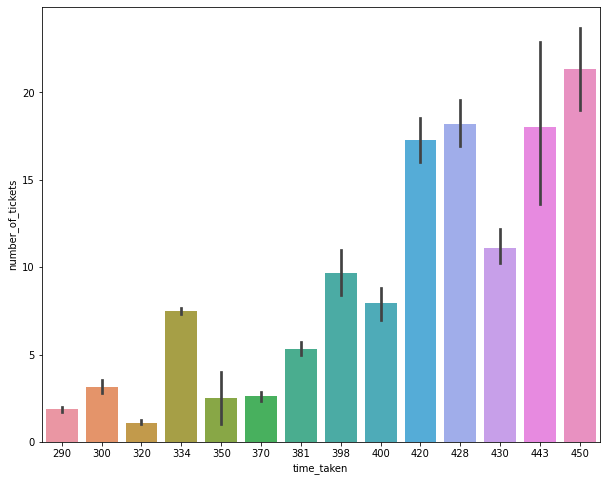

In [ ]:
# Time taken and distance trend.
plt.rcParams['figure.figsize']= (10,8)
sns.barplot(x= 'time_taken',y= 'number_of_tickets', data= df)

##### 1. Why did you pick the specific chart?

Time taken to reach the destination hava a positive relation with number of tickets. Distance also have some what positive relation with number of tickets.

##### 2. What is/are the insight(s) found from the chart?

We can say that max. number of tickets booking require max. no. of time. 

#### **Chart - 9**

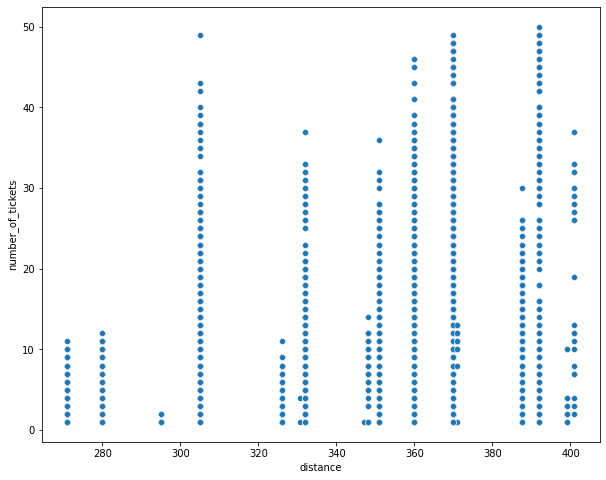

In [ ]:
# Tickets sales realtion with the distance
plt.rcParams['figure.figsize']= (10,8)
sns.scatterplot(x= 'distance',y= 'number_of_tickets', data= df)
plt.show()

##### 1. Why did you pick the specific chart?

We choose this grapht to show the relation of tickets booking with the distance.

##### 2. What is/are the insight(s) found from the chart?

Number of tickets sold  is increasing with increase in time taken an distance.

As we can see that most ticket are booked for far distance , for small distance very low tickets booking happened.

## ***5. Feature Engineering & Data Pre-processing***

### 1. Handling Missing Values

In [ ]:
# Handling Missing Values & Missing Value Imputation
df.isna()

,ride_id,seat_number,payment_method,payment_receipt,travel_date,travel_time,travel_from,travel_to,car_type,max_capacity,...,day_of_week,day_of_year,day_of_month,is_weekend,hour,minute,month,distance,time_taken,speed
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6244,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
6245,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
6246,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
6247,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


#### What all missing value imputation techniques have you used and why did you use those techniques?

In our refined and cleaned dataset we didn't find any missing values.

### 2. Handling Outliers

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


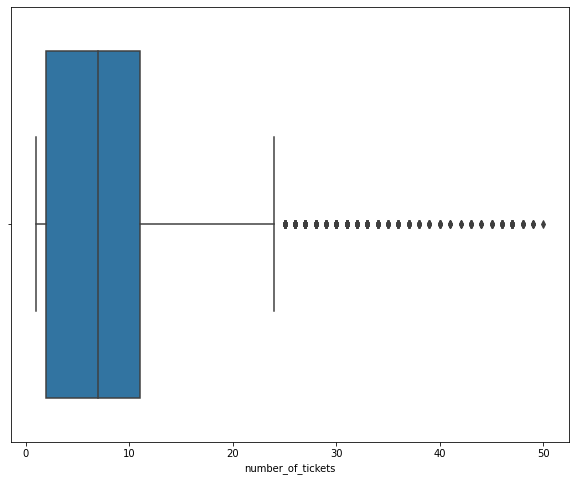

In [ ]:
# Checking Outliers in our variable. 
import seaborn as sns
sns.boxplot(df['number_of_tickets'])

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


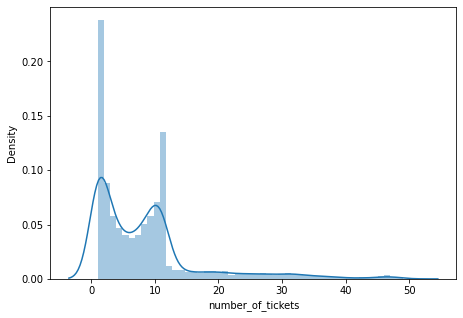

In [ ]:
# Plotting distplot graph to understand the outliers more easily.
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(16,5))
plt.subplot(1,2,1)
sns.distplot(df['number_of_tickets'])
plt.show()

In [ ]:
#Removing outliers From book_tickets column
df = df[df['number_of_tickets'] <= 23]
df.head()

,ride_id,seat_number,payment_method,payment_receipt,travel_date,travel_time,travel_from,travel_to,car_type,max_capacity,...,day_of_week,day_of_year,day_of_month,is_weekend,hour,minute,month,distance,time_taken,speed
0,1442,15A,Mpesa,UZUEHCBUSO,2017-10-17,2023-02-10 07:15:00,Migori,Nairobi,Bus,49,...,1,290,17,0,7,15,10,370.0,428,0.864486
1,5437,14A,Mpesa,TIHLBUSGTE,2017-11-19,2023-02-10 07:12:00,Migori,Nairobi,Bus,49,...,6,323,19,1,7,12,11,370.0,428,0.864486
2,5710,8B,Mpesa,EQX8Q5G19O,2017-11-26,2023-02-10 07:05:00,Keroka,Nairobi,Bus,49,...,6,330,26,1,7,5,11,280.0,300,0.933333
3,5777,19A,Mpesa,SGP18CL0ME,2017-11-27,2023-02-10 07:10:00,Homa Bay,Nairobi,Bus,49,...,0,331,27,0,7,10,11,360.0,420,0.857143
6,5784,1X,Mpesa,3OPU23FHRB,2018-04-20,2023-02-10 05:10:00,Kisii,Nairobi,shuttle,11,...,4,110,20,0,5,10,4,305.1,334,0.913473


/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


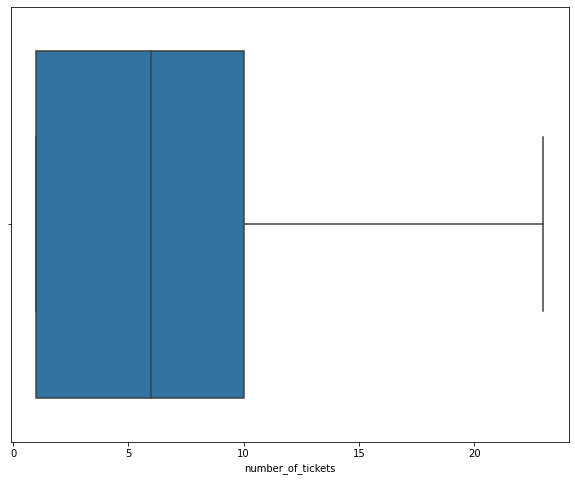

In [ ]:
# checking outliers by using boxplot
import seaborn as sns
sns.boxplot(df['number_of_tickets'])

##### What all outlier treatment techniques have you used and why did you use those techniques?

We used the "Trimming/removing the outlier" Technique to remove outlier.WE used this technique because in our number of ticket showing 50, but max. capacity per ride is 49 only... 

### 3. Categorical Encoding

In [ ]:
# Encode your categorical columns
#Encoding means:-- coverting categorical features into Numerical.
df = pd.get_dummies(df, columns=['travel_from','car_type'], drop_first=True)

In [ ]:
df.head()

,ride_id,seat_number,payment_method,payment_receipt,travel_date,travel_time,travel_to,max_capacity,number_of_tickets,day_of_week,...,travel_from_Mbita,travel_from_Migori,travel_from_Ndhiwa,travel_from_Nyachenge,travel_from_Oyugis,travel_from_Rodi,travel_from_Rongo,travel_from_Sirare,travel_from_Sori,car_type_shuttle
0,1442,15A,Mpesa,UZUEHCBUSO,2017-10-17,2023-02-10 07:15:00,Nairobi,49,1,1,...,0,1,0,0,0,0,0,0,0,0
1,5437,14A,Mpesa,TIHLBUSGTE,2017-11-19,2023-02-10 07:12:00,Nairobi,49,1,6,...,0,1,0,0,0,0,0,0,0,0
2,5710,8B,Mpesa,EQX8Q5G19O,2017-11-26,2023-02-10 07:05:00,Nairobi,49,1,6,...,0,0,0,0,0,0,0,0,0,0
3,5777,19A,Mpesa,SGP18CL0ME,2017-11-27,2023-02-10 07:10:00,Nairobi,49,5,0,...,0,0,0,0,0,0,0,0,0,0
6,5784,1X,Mpesa,3OPU23FHRB,2018-04-20,2023-02-10 05:10:00,Nairobi,11,1,4,...,0,0,0,0,0,0,0,0,0,1


In [ ]:
df.columns

Index(['ride_id', 'seat_number', 'payment_method', 'payment_receipt',
       'travel_date', 'travel_time', 'travel_to', 'max_capacity',
       'number_of_tickets', 'day_of_week', 'day_of_year', 'day_of_month',
       'is_weekend', 'hour', 'minute', 'month', 'distance', 'time_taken',
       'speed', 'travel_from_Homa Bay', 'travel_from_Kehancha',
       'travel_from_Kendu Bay', 'travel_from_Keroka', 'travel_from_Keumbu',
       'travel_from_Kijauri', 'travel_from_Kisii', 'travel_from_Mbita',
       'travel_from_Migori', 'travel_from_Ndhiwa', 'travel_from_Nyachenge',
       'travel_from_Oyugis', 'travel_from_Rodi', 'travel_from_Rongo',
       'travel_from_Sirare', 'travel_from_Sori', 'car_type_shuttle'],
      dtype='object')

#### What all categorical encoding techniques have you used & why did you use those techniques?

We used the "Binary_Encoding" technique to convert the categorical values into numerical ones.

### 4. Feature Manipulation & Selection

#### 1. Feature Manipulation

In [ ]:
# Manipulate Features to minimize feature correlation and create new features
linear_data = df.copy() # Here we have made a copy of our dataset.
linear_data.columns

Index(['ride_id', 'seat_number', 'payment_method', 'payment_receipt',
       'travel_date', 'travel_time', 'travel_to', 'max_capacity',
       'number_of_tickets', 'day_of_week', 'day_of_year', 'day_of_month',
       'is_weekend', 'hour', 'minute', 'month', 'distance', 'time_taken',
       'speed', 'travel_from_Homa Bay', 'travel_from_Kehancha',
       'travel_from_Kendu Bay', 'travel_from_Keroka', 'travel_from_Keumbu',
       'travel_from_Kijauri', 'travel_from_Kisii', 'travel_from_Mbita',
       'travel_from_Migori', 'travel_from_Ndhiwa', 'travel_from_Nyachenge',
       'travel_from_Oyugis', 'travel_from_Rodi', 'travel_from_Rongo',
       'travel_from_Sirare', 'travel_from_Sori', 'car_type_shuttle'],
      dtype='object')

#### 2. Feature Selection

In [ ]:
# Select your features wisely to avoid overfitting
unnecessary_cols = ['ride_id', 'seat_number', 'payment_method', 'payment_receipt',
       'travel_date', 'travel_time','number_of_tickets', 'distance', 'time_taken', 'travel_to']

##### What all feature selection methods have you used  and why?

We are using Filter method of Superwised ML , because all of our features have a name in particular.

## ***6. Data Splitting***



In [ ]:
## Importing all the sklearn library  
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error,r2_score
import math

In [ ]:
# Split your data to train and test. Choose Splitting ratio wisely.
X= linear_data.iloc[:,9:36]
Y= linear_data['number_of_tickets']

# ***7. ML Model Implementation***



# **ML Model - 1 Implementing Linear Regression**

In [ ]:
# ML Model - 1 Implementation
# train test split
X_train, X_test, y_train, y_test = train_test_split(X,Y,test_size=0.3, random_state=42)
reg = LinearRegression()

# Fit the Algorithm
# fitting linear model
reg.fit(X_train, y_train)

LinearRegression()

In [ ]:
#Predict on the Model

y_pred_train = reg.predict(X_train)
y_pred = reg.predict(X_test)
r2_score_test = r2_score(y_test,y_pred)
print('r2_score:',r2_score_test)

adj_r2=1-(1-r2_score(y_test, y_pred))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1))
print('Adjusted r2_score :',adj_r2)

r2_score: 0.22846460579905015
Adjusted r2_score : 0.2162966994652734


In [ ]:
# Model score on Train and Test
train_model = reg.score(X_train,y_train)
print('Training Accuracy:',train_model)

test_model = reg.score(X_test,y_test)
print('Testing Accuracy:',test_model)

Training Accuracy: 0.23910780491522787
Testing Accuracy: 0.22846460579905015


In [ ]:
# Test dataset Matrics
MSE  = mean_squared_error(y_test,y_pred)
print("MSE :" , MSE)

RMSE = np.sqrt(MSE)
print("RMSE :" ,RMSE)

MAE = mean_absolute_error(y_test,y_pred)
print('MAE :' ,MAE)

MAPE = np.mean(np.abs((y_test - y_pred) / y_test)) * 100
print('MAPE :',MAPE)

MSE : 19.303230464062118
RMSE : 4.393544180278846
MAE : 3.446755606184304
MAPE : 146.1803627895248


#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

Observation:- We can see that our model performence is not good, Lets try some other models.

# **ML Model - 2 Implementing Lasso Regression**

In [ ]:
lasso_data = df.copy()

In [ ]:
from sklearn.linear_model import Lasso
from sklearn.model_selection import train_test_split

#creating dependent and independent variable
X= linear_data.iloc[:,9:36]
Y= linear_data['number_of_tickets']

# train test split
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3 , random_state= 42 )

In [ ]:
X_test.shape

(1740, 27)

In [ ]:
#lasso = Lasso()
alphas = [0.01,0.025, 0.1, 1, 5, 8]
for alpha in alphas:
  lasso = Lasso(alpha=alpha ,max_iter= 1000)
  lasso.fit(X_train, y_train)
  print('alpha: ',alpha)
  print('test Score: ',lasso.score(X_test, y_test))
  print('train Score: ',lasso.score(X_train, y_train))


/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.826e+02, tolerance: 1.036e+01
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 6.098e+01, tolerance: 1.036e+01
  model = cd_fast.enet_coordinate_descent(


alpha:  0.01
test Score:  0.22176048830512152
train Score:  0.23099651307810665
alpha:  0.025
test Score:  0.21589167003199528
train Score:  0.22152008108517196
alpha:  0.1
test Score:  0.19274322212730643
train Score:  0.19130339829347376
alpha:  1
test Score:  0.11884245920475633
train Score:  0.11499630502396274
alpha:  5
test Score:  0.10153118553502483
train Score:  0.09998520767589114
alpha:  8
test Score:  0.09233072304685397
train Score:  0.09183870699321361


we can see that alpha = 0.1 is giving us best score.

In [ ]:
lasso = Lasso(alpha=0.1 , max_iter= 1000 )
lasso.fit(X_train, y_train)

Lasso(alpha=0.1)

In [ ]:
y_pred_train = lasso.predict(X_train)
y_pred = lasso.predict(X_test)

In [ ]:
r2_score_test = r2_score(y_test,y_pred)
print('r2_score:',r2_score_test)

adj_r2=1-(1-r2_score(y_test, y_pred))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1))
print('Adjusted r2_score :',adj_r2)

r2_score: 0.19274322212730643
Adjusted r2_score : 0.18001195285010851


In [ ]:
# Model score on Train and Test
train_model = lasso.score(X_train,y_train)
print('Training Accuracy:',train_model)

test_model = lasso.score(X_test,y_test)
print('Testing Accuracy:',test_model)


Training Accuracy: 0.19130339829347376
Testing Accuracy: 0.19274322212730643


In [ ]:
# Test dataset Matrics
MSE  = mean_squared_error(y_test,y_pred)
print("MSE :" , MSE)

RMSE = np.sqrt(MSE)
print("RMSE :" ,RMSE)

MAE = mean_absolute_error(y_test,y_pred)
print('MAE :' ,MAE)

MAPE = np.mean(np.abs((y_test - y_pred) / y_test)) * 100
print('MAPE :',MAPE)

MSE : 20.196952393987292
RMSE : 4.494101956340921
MAE : 3.6190003902306014
MAPE : 154.3858271409699


# **ML Model - 3 Implementing Ridge Regression**

In [ ]:
from sklearn.linear_model import Ridge
ridge_data = df.copy()

In [ ]:
# ML Model - 3 Implementation
#creating dependent and independent variable
X= linear_data.iloc[:,9:36]
Y= linear_data['number_of_tickets']

# train test split
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3 , random_state= 42 )


# Fit the Algorithm
alpha = [0.01,0.025, 0.1, 1, 5, 8,7,9,10]
for alpha in alphas:
  ridge = Ridge(alpha =alpha, max_iter= 1000)
  ridge.fit(X_train, y_train)
  print('alpha: ',alpha)
  print('test Score: ',ridge.score(X_test, y_test))
  print('train Score: ',ridge.score(X_train, y_train))

ridge = Ridge(alpha =1, max_iter= 1000)
ridge.fit(X_train, y_train)

alpha:  0.01
test Score:  0.22847555144181664
train Score:  0.23910771396727282
alpha:  0.025
test Score:  0.22849147792551627
train Score:  0.2391072431631942
alpha:  0.1
test Score:  0.22856282942006156
train Score:  0.2390993213141538
alpha:  1
test Score:  0.22879913719274403
train Score:  0.23862686146546475
alpha:  5
test Score:  0.2276028160005248
train Score:  0.23597256290381818
alpha:  8
test Score:  0.22675083892060954
train Score:  0.23450426705017302


Ridge(alpha=1, max_iter=1000)

In [ ]:
y_pred_train = ridge.predict(X_train)
y_pred = ridge.predict(X_test)

In [ ]:
# Model score on Train and Test
train_model = ridge.score(X_train,y_train)
print('Training Accuracy:',train_model)

test_model = ridge.score(X_test,y_test)
print('Testing Accuracy:',test_model)

Training Accuracy: 0.23862686146546475
Testing Accuracy: 0.22879913719274403


In [ ]:
r2_score_test = r2_score(y_test,y_pred)
print('r2_score:',r2_score_test)

adj_r2=1-(1-r2_score(y_test, y_pred))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1))
print('Adjusted r2_score :',adj_r2)

r2_score: 0.22879913719274403
Adjusted r2_score : 0.21663650676295665


In [ ]:
# Test dataset Matrics
MSE  = mean_squared_error(y_test,y_pred)
print("MSE :" , MSE)

RMSE = np.sqrt(MSE)
print("RMSE :" ,RMSE)

MAE = mean_absolute_error(y_test,y_pred)
print('MAE :' ,MAE)

MAPE = np.mean(np.abs((y_test - y_pred) / y_test)) * 100
print('MAPE :',MAPE)

MSE : 19.294860742285938
RMSE : 4.392591574718271
MAE : 3.4475668893912346
MAPE : 146.43418069771494


# **ML Model - 4 Implementing Decision Tree**

In [ ]:
from sklearn.tree import DecisionTreeRegressor
decision_tree_data = df.copy()

In [ ]:
# multicollinearity does not affect Tree based model so we will include distance and time take.
unnecessary_cols = ['ride_id', 'seat_number', 'payment_method', 'payment_receipt',
       'travel_date', 'travel_time','number_of_tickets', 'travel_to']

In [ ]:
# creating dependent and independant variable.
X= linear_data.iloc[:,9:36]
Y= linear_data['number_of_tickets']

#train and test split
X_train , X_test, y_train, y_test = train_test_split(X,Y, test_size= 0.30, random_state=100 )

In [ ]:
# fitting decision tree model
tree_model = DecisionTreeRegressor( criterion='squared_error', max_leaf_nodes=90,max_depth= 30,random_state=100)
tree_model.fit(X_train, y_train)

DecisionTreeRegressor(max_depth=30, max_leaf_nodes=90, random_state=100)

In [ ]:
y_pred = tree_model.predict(X_test)

In [ ]:
# Model score on Train and Test
train_model = tree_model.score(X_train,y_train)
print('Training Accuracy:',train_model)

test_model = tree_model.score(X_test,y_test)
print('Testing Accuracy:',test_model)

Training Accuracy: 0.5337716350191217
Testing Accuracy: 0.35183097533177987


In [ ]:
r2_score_test = r2_score(y_test,y_pred)
print('r2_score:',r2_score_test)

adj_r2=1-(1-r2_score(y_test, y_pred))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1))
print('Adjusted r2_score :',adj_r2)

r2_score: 0.35183097533177987
Adjusted r2_score : 0.341608683470774


In [ ]:
# Test dataset Matrics
MSE  = mean_squared_error(y_test,y_pred)
print("MSE :" , MSE)

RMSE = np.sqrt(MSE)
print("RMSE :" ,RMSE)

MAE = mean_absolute_error(y_test,y_pred)
print('MAE :' ,MAE)

MAPE = np.mean(np.abs((y_test-y_pred) / y_test)) * 100
print('MAPE :',MAPE)

MSE : 15.891483205956115
RMSE : 3.9864123226224497
MAE : 2.8560710727189704
MAPE : 104.13074974908089


We can see we are not getting good score so far, Lets try **Ensemble methods**

# **ML Model- 5 Implementing Random Forest Regressor**




In [ ]:
from sklearn.ensemble import RandomForestRegressor
random_forest_data = df.copy()

In [ ]:
# multicollinearity does not affect Tree based model so we will include distance and time take.
unnecessary_cols = ['ride_id', 'seat_number', 'payment_method', 'payment_receipt',
       'travel_date', 'travel_time','number_of_tickets', 'travel_to']

In [ ]:
# splitting
X= linear_data.iloc[:,9:36]
Y= linear_data['number_of_tickets']

#train and test split
X_train , X_test, y_train, y_test = train_test_split(X,Y, test_size= 0.30, random_state= 42)

In [ ]:
random_reg = RandomForestRegressor(n_estimators = 80, random_state = 42)

random_reg.fit(X_train,y_train)


RandomForestRegressor(n_estimators=80, random_state=42)

In [ ]:
# Model score on Train and Test
train_model = random_reg.score(X_train,y_train)
print('Training Accuracy:',train_model)

test_model = random_reg.score(X_test,y_test)
print('Testing Accuracy:',test_model)


Training Accuracy: 0.9224704418531942
Testing Accuracy: 0.43639385658760255


In [ ]:
r2_score_test = r2_score(y_test,y_pred)
print('r2_score:',r2_score_test)

adj_r2=1-(1-r2_score(y_test, y_pred))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1))
print('Adjusted r2_score :',adj_r2)

r2_score: -0.6078839174693471
Adjusted r2_score : -0.6332418998126139


In [ ]:
# Test dataset Matrics
MSE  = mean_squared_error(y_test,y_pred)
print("MSE :" , MSE)

RMSE = np.sqrt(MSE)
print("RMSE :" ,RMSE)

MAE = mean_absolute_error(y_test,y_pred)
print('MAE :' ,MAE)

MAPE = np.mean(np.abs((y_test - y_pred) / y_test)) * 100
print('MAPE :',MAPE)

MSE : 40.22803626593704
RMSE : 6.342557549280656
MAE : 5.038128916406141
MAPE : 203.60940399115174


Our model seem to overfit lets do hyperperemeter tuning using GridSearchCV, RandomSerchCV.

# **Random forest Regressor using GridSearchCV, RandomSearchCV**

In [ ]:
from sklearn.model_selection import RandomizedSearchCV

In [ ]:
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]
# Number of features to consider at every split
max_features = [ 'sqrt','log2']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 1000,10)]
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10,14]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4,6,8]
# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
              'criterion':['squared_error','absolute_error','poisson']}
print(random_grid)

{'n_estimators': [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000], 'max_features': ['sqrt', 'log2'], 'max_depth': [10, 120, 230, 340, 450, 560, 670, 780, 890, 1000], 'min_samples_split': [2, 5, 10, 14], 'min_samples_leaf': [1, 2, 4, 6, 8], 'criterion': ['squared_error', 'absolute_error', 'poisson']}


In [ ]:
estimator = RandomForestRegressor()
random = RandomizedSearchCV( estimator=estimator, param_distributions=random_grid, n_iter=3, cv=2, verbose=1,
                               random_state=0 )

In [ ]:
random.fit(X_train,y_train)

Fitting 2 folds for each of 3 candidates, totalling 6 fits


RandomizedSearchCV(cv=2, estimator=RandomForestRegressor(), n_iter=3,
                   param_distributions={'criterion': ['squared_error',
                                                      'absolute_error',
                                                      'poisson'],
                                        'max_depth': [10, 120, 230, 340, 450,
                                                      560, 670, 780, 890,
                                                      1000],
                                        'max_features': ['sqrt', 'log2'],
                                        'min_samples_leaf': [1, 2, 4, 6, 8],
                                        'min_samples_split': [2, 5, 10, 14],
                                        'n_estimators': [200, 400, 600, 800,
                                                         1000, 1200, 1400, 1600,
                                                         1800, 2000]},
                   random_state=0, verbose=1)

In [ ]:
random.best_params_

{'n_estimators': 600,
 'min_samples_split': 5,
 'min_samples_leaf': 6,
 'max_features': 'log2',
 'max_depth': 670,
 'criterion': 'squared_error'}

# **Now lets use GridSearchCV on this best parameters.**

In [ ]:
from sklearn.model_selection import GridSearchCV

In [ ]:
random_grid ={'criterion': ['squared_error'],
 'max_depth':[655,660,670],
 'max_features': ['log2'],
 'min_samples_leaf':[6],
 'min_samples_split': [5],
 'n_estimators': [550,650,600]}

In [ ]:
estimator = RandomForestRegressor()
grid = GridSearchCV( estimator=estimator, param_grid =random_grid, cv=3, verbose=1
                               ,n_jobs=-1 )

In [ ]:
grid.fit(X,Y)

Fitting 3 folds for each of 9 candidates, totalling 27 fits


GridSearchCV(cv=3, estimator=RandomForestRegressor(), n_jobs=-1,
             param_grid={'criterion': ['squared_error'],
                         'max_depth': [655, 660, 670], 'max_features': ['log2'],
                         'min_samples_leaf': [6], 'min_samples_split': [5],
                         'n_estimators': [550, 650, 600]},
             verbose=1)

In [ ]:
grid.best_params_

{'criterion': 'squared_error',
 'max_depth': 670,
 'max_features': 'log2',
 'min_samples_leaf': 6,
 'min_samples_split': 5,
 'n_estimators': 550}

In [ ]:
y_pred = grid.predict(X_test)

In [ ]:
# Model score on Train and Test
train_model = grid.score(X_train,y_train)
print('Training Accuracy:',train_model)

test_model = grid.score(X_test,y_test)
print('Testing Accuracy:',test_model)

Training Accuracy: 0.5330333444538329
Testing Accuracy: 0.5322810924129235


In [ ]:
r2_score_test = r2_score(y_test,y_pred)
print('r2_score:',r2_score_test)

adj_r2=1-(1-r2_score(y_test, y_pred))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1))
print('Adjusted r2_score :',adj_r2)

r2_score: 0.5322810924129235
Adjusted r2_score : 0.5249046844077534


In [ ]:
# Test dataset Matrics
MSE  = mean_squared_error(y_test,y_pred)
print("MSE :" , MSE)

RMSE = np.sqrt(MSE)
print("RMSE :" ,RMSE)

MAE = mean_absolute_error(y_test,y_pred)
print('MAE :' ,MAE)

MAPE = np.mean(np.abs((y_test - y_pred) / y_test)) * 100
print('MAPE :',MAPE)

MSE : 11.701972370176447
RMSE : 3.4208145769942644
MAE : 2.5507171262974255
MAPE : 101.65447322713743


# **ML Model- 6 Implementing XGboost** 

In [ ]:
import xgboost as xgb

In [ ]:
# multicollinearity does not affect Tree based model so we will include distance and time take.
unnecessary_cols = ['ride_id', 'seat_number', 'payment_method', 'payment_receipt',
       'travel_date', 'travel_time','number_of_tickets', 'travel_to']

In [ ]:
xgboost_data = df.copy()
# Splitting
X= linear_data.iloc[:,9:36]
Y= linear_data['number_of_tickets']

#train and test split
X_train , X_test, y_train, y_test = train_test_split(X,Y, test_size= 0.3, random_state=42 )


In [ ]:
xgb_reg = xgb.XGBRegressor(
                        booster= 'gbtree',
                        eta= 1,
                        learning_rate= 0.4,
                        max_depth= 7,
                        min_child_weight= 10,
                        n_jobs= 5,
                        objective= 'reg:linear',
                        random_state= 200,
                        scale_pos_weight= 5,
                        verbosity= 3)

xgb_reg.fit(X_train,y_train)

[13:48:22] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[13:48:22] INFO: /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 160 extra nodes, 0 pruned nodes, max_depth=7
[13:48:22] INFO: /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 178 extra nodes, 0 pruned nodes, max_depth=7
[13:48:22] INFO: /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 166 extra nodes, 0 pruned nodes, max_depth=7
[13:48:22] INFO: /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 162 extra nodes, 0 pruned nodes, max_depth=7
[13:48:22] INFO: /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 130 extra nodes, 0 pruned nodes, max_depth=7
[13:48:22] INFO: /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 140 extra nodes, 0 pruned nodes, max_depth=7
[13:48:22] INFO: /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 114 extr

XGBRegressor(eta=1, learning_rate=0.4, max_depth=7, min_child_weight=10,
             n_jobs=5, random_state=200, scale_pos_weight=5, verbosity=3)

In [ ]:
y_pred = xgb_reg.predict(X_test)

In [ ]:
# Model score on Train and Test
train_model = xgb_reg.score(X_train,y_train)
print('Training Accuracy:',train_model)

test_model = xgb_reg.score(X_test,y_test)
print('Testing Accuracy:',test_model)

Training Accuracy: 0.8217580204416748
Testing Accuracy: 0.40147811443791603


In [ ]:
r2_score_test = r2_score(y_test,y_pred)
print('r2_score:',r2_score_test)

adj_r2=1-(1-r2_score(y_test, y_pred))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1))
print('Adjusted r2_score :',adj_r2)

r2_score: 0.40147811443791603
Adjusted r2_score : 0.39203880899972887


In [ ]:
# Test dataset Matrics
MSE  = mean_squared_error(y_test,y_pred)
print("MSE :" , MSE)

RMSE = np.sqrt(MSE)
print("RMSE :" ,RMSE)

MAE = mean_absolute_error(y_test,y_pred)
print('MAE :' ,MAE)

MAPE = np.mean(np.abs((y_test - y_pred) / y_test)) * 100
print('MAPE :',MAPE)

MSE : 14.97456368382859
RMSE : 3.8696981385928013
MAE : 2.744488693636724
MAPE : 95.40086282086837


Our XGboost model seem to over fit lets GridSearchCV to try multiple Parameters.

# **XGboost using GridSearchCV**

In [ ]:
import xgboost as xgb
from sklearn.model_selection import GridSearchCV

In [ ]:
xgb = xgb.XGBRegressor()


In [ ]:
params = {"min_child_weight":[9,10,11], 
          'eta': [0.05,0.06,0.07],
          'eval_metric':['rmse'], 
          'colsample_bytree':[0.6],
          'max_depth': [8,9,10],
          }

In [ ]:
xgb_grid = GridSearchCV(xgb,param_grid=params, verbose=1,cv=7)
xgb_grid.fit(X, Y)

Fitting 7 folds for each of 27 candidates, totalling 189 fits
[13:48:24] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[13:48:25] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[13:48:26] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[13:48:27] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[13:48:28] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[13:48:28] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[13:48:29] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[13:48:30] WARNING: /workspace/src/objective/regr

GridSearchCV(cv=7, estimator=XGBRegressor(),
             param_grid={'colsample_bytree': [0.6], 'eta': [0.05, 0.06, 0.07],
                         'eval_metric': ['rmse'], 'max_depth': [8, 9, 10],
                         'min_child_weight': [9, 10, 11]},
             verbose=1)

In [ ]:
xgb_grid.best_params_

{'colsample_bytree': 0.6,
 'eta': 0.05,
 'eval_metric': 'rmse',
 'max_depth': 8,
 'min_child_weight': 10}

In [ ]:
xgb_grid.best_estimator_.get_params()

{'base_score': 0.5,
 'booster': 'gbtree',
 'colsample_bylevel': 1,
 'colsample_bynode': 1,
 'colsample_bytree': 0.6,
 'gamma': 0,
 'importance_type': 'gain',
 'learning_rate': 0.1,
 'max_delta_step': 0,
 'max_depth': 8,
 'min_child_weight': 10,
 'missing': None,
 'n_estimators': 100,
 'n_jobs': 1,
 'nthread': None,
 'objective': 'reg:linear',
 'random_state': 0,
 'reg_alpha': 0,
 'reg_lambda': 1,
 'scale_pos_weight': 1,
 'seed': None,
 'silent': None,
 'subsample': 1,
 'verbosity': 1,
 'eta': 0.05,
 'eval_metric': 'rmse'}

In [ ]:
y_pred = xgb_grid.predict(X_test)

In [ ]:
# Model score on Train and Test
train_model = xgb_grid.score(X_train,y_train)
print('Training Accuracy:',train_model)

test_model = xgb_grid.score(X_test,y_test)
print('Testing Accuracy:',test_model)

Training Accuracy: 0.6771763689400063
Testing Accuracy: 0.6786557359994023


In [ ]:
r2_score_test = r2_score(y_test,y_pred)
print('r2_score:',r2_score_test)

adj_r2=1-(1-r2_score(y_test, y_pred))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1))
print('Adjusted r2_score :',adj_r2)

r2_score: 0.6786557359994023
Adjusted r2_score : 0.6735878066021965


In [ ]:
# Test dataset Matrics
MSE  = mean_squared_error(y_test,y_pred)
print("MSE :" , MSE)

RMSE = np.sqrt(MSE)
print("RMSE :" ,RMSE)

MAE = mean_absolute_error(y_test,y_pred)
print('MAE :' ,MAE)

MAPE = np.mean(np.abs((y_test - y_pred) / y_test)) * 100
print('MAPE :',MAPE)

MSE : 8.039789791798409
RMSE : 2.8354523081509253
MAE : 2.0432390749454497
MAPE : 77.2819429230235


# **Important Features**

In [ ]:
# arry of important features
importance = xgb_grid.best_estimator_.feature_importances_
importance

array([0.00932649, 0.01595669, 0.015412  , 0.00818019, 0.04326277,
       0.02577113, 0.01368203, 0.02874317, 0.11473707, 0.15552613,
       0.03725157, 0.01901772, 0.        , 0.02618801, 0.00082403,
       0.15555292, 0.01459348, 0.00076524, 0.01042658, 0.0153276 ,
       0.1334043 , 0.        , 0.00640922, 0.01107308, 0.02244905,
       0.07939136, 0.03672807], dtype=float32)

Text(0.5, 0, 'Xgboost Feature Importance')

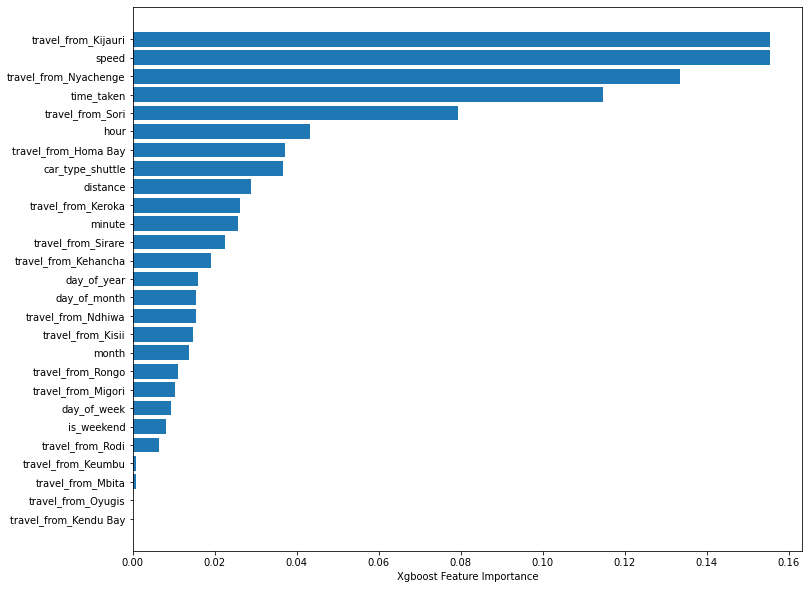

In [ ]:
# plotting important features using Xgboost in built function.
plt.figure(figsize=(12,10))
sorted_idx = xgb_grid.best_estimator_.feature_importances_.argsort()
plt.barh(X.columns[sorted_idx],importance[sorted_idx])
plt.xlabel('Xgboost Feature Importance')

We can see the list of most important features in our data in above barplot.

# **Evaluating all  models**

In [ ]:
# creating DataFrame containing all the evaluation Matrics.
data = {'Model Name':["Linear Regression","Lasso Regression","Ridge Regression","Decision Tree",'Random Forest','Xgboost'],'Train Accuracy':[0.23910780491522787,  0.23099651307810665, 0.23862686146546475, 0.5337716350191217, 0.5333898653313804, 0.6771763689400063],'Test Accuracy':[0.22846460579905015, 0.22176048830512152, 0.22879913719274403, 0.35183097533177987, 0.5313779218408402, 0.6786557359994023],'r2_score':[0.22846460579905015, 0.19274322212730643, 0.22879913719274403, 0.35183097533177987, 0.5313779218408402, 0.6786557359994023],'Adjusted r2_score':[0.2162966994652734, 0.18001195285010851, 0.2166365067629566, 0.341608683470774, 0.5239872699072553, 0.6735878066021965],'MSE':[19.303230464062118, 20.196952393987292, 19.294860742285938, 15.891483205956115, 11.72456901296474, 8.039789791798409],'RMSE':[4.393544180278846, 4.494101956340921, 4.392591574718271, 3.9864123226224497, 3.4241158001686713, 2.8354523081509253],'MAE':[3.446755606184304, 3.6190003902306014, 3.4475668893912346, 2.8560710727189704, 2.5565729513180986, 2.0432390749454497],'MAPE':[146.1803627895248, 154.3858271409699, 146.43418069771494, 104.13074974908089, 102.1227268212489,77.2819429230235]}

In [ ]:
evaluation = pd.DataFrame(data)
evaluation

,Model Name,Train Accuracy,Test Accuracy,r2_score,Adjusted r2_score,MSE,RMSE,MAE,MAPE
0,Linear Regression,0.239108,0.228465,0.228465,0.216297,19.303230,4.393544,3.446756,146.180363
1,Lasso Regression,0.230997,0.221760,0.192743,0.180012,20.196952,4.494102,3.619000,154.385827
2,Ridge Regression,0.238627,0.228799,0.228799,0.216637,19.294861,4.392592,3.447567,146.434181
3,Decision Tree,0.533772,0.351831,0.351831,0.341609,15.891483,3.986412,2.856071,104.130750
4,Random Forest,0.533390,0.531378,0.531378,0.523987,11.724569,3.424116,2.556573,102.122727
5,Xgboost,0.677176,0.678656,0.678656,0.673588,8.039790,2.835452,2.043239,77.281943


Observation:

1.   We can see from above table that Xgboost highest Training and Test Accuracy.
2.   Xgboost also have best r2 and Adjusted r2 score.

1.   It also have minimum MSE,RMSE,MAE and MAPE errors.
2.   From above observations we can say that Xgboost is the best Model.





# **Conclusion**



1.   **As we have implemented six different models to predict the number of seats that Mobiticket can expect to sell for each ride. Linear Regression, Regularized linear regression (Ridge and Lasso), Decision Tree, Random Forest Regressor and Xgboost Regressor. Xgboost regression model performed the best among them.**
2.   **Our Model will help Mobiticket and Bus operators to anticipate the number of tickets they can expect to sell for each ride.**

